In [1]:
# import required libraries

import os

import numpy as np
import pandas as pd

import tifffile
import glob

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
np.random.seed(765) # set random seed

In [3]:
src_type8 = ['he1', 'he2', 'he3', 'he4', 'cd', 'ck', 'ki', 'mt']
src_dir = {'he1': 'HE', 'he2': 'HE', 'he3': 'HE', 'he4': 'HE', 'cd': 'CD31', 'ck': 'CK19', 'ki': 'Ki67', 'mt': 'MT'}

In [4]:
nc = 8 # number of slide in each set

tif8 = pd.read_csv('filename_tif8_block2.txt', header=0, sep='\t')

sid8 = {'he1': 1, 'he2': 3, 'he3': 5, 'he4': 7, 'cd': 0, 'ck': 4, 'ki': 2, 'mt': 6}

tifflist_cd = glob.glob('/project/dsc-is/data/KPCL159/Block2/CD31/*.tif')
tifflist_ck = glob.glob('/project/dsc-is/data/KPCL159/Block2/CK19/*.tif')
tifflist_he = glob.glob('/project/dsc-is/data/KPCL159/Block2/HE/*.tif')
tifflist_ki = glob.glob('/project/dsc-is/data/KPCL159/Block2/Ki67/*.tif')
tifflist_mt = glob.glob('/project/dsc-is/data/KPCL159/Block2/MT/*.tif')

dir_tiff = '/project/dsc-is/data/KPCL159/Block2'
    
tifflist5 = [tifflist_cd, tifflist_ck, tifflist_he, tifflist_ki, tifflist_mt]

In [5]:
tif8

CD31                   HE_1                     Ki67  \
0    KPCL159_2_0017_CD31.tif  KPCL159-2-0018-HE.tif  KPCL159-2-0019-Ki67.tif   
1    KPCL159_2_0025_CD31.tif  KPCL159-2-0026-HE.tif  KPCL159-2-0027-Ki67.tif   
2    KPCL159_2_0033_CD31.tif  KPCL159-2-0034-HE.tif  KPCL159-2-0035-Ki67.tif   
3    KPCL159_2_0041_CD31.tif  KPCL159-2-0042-HE.tif  KPCL159-2-0043-Ki67.tif   
4    KPCL159_2_0049_CD31.tif  KPCL159-2-0050-HE.tif  KPCL159-2-0051-Ki67.tif   
..                       ...                    ...                      ...   
186  KPCL159_2_1521_CD31.tif  KPCL159-2-1522-HE.tif  KPCL159-2-1523-Ki67.tif   
187  KPCL159_2_1529_CD31.tif  KPCL159-2-1530-HE.tif  KPCL159-2-1531-Ki67.tif   
188  KPCL159_2_1537_CD31.tif  KPCL159-2-1538-HE.tif  KPCL159-2-1539-Ki67.tif   
189  KPCL159_2_1545_CD31.tif  KPCL159-2-1546-HE.tif  KPCL159-2-1547-Ki67.tif   
190  KPCL159_2_1553_CD31.tif  KPCL159-2-1554-HE.tif  KPCL159-2-1555-Ki67.tif   

                      HE_2                     CK19                   HE_3  \
0    KPCL159-2-0020-HE.tif  KPCL159_2_0021_CK19.tif  KPCL159-2-0022-HE.tif   
1    KPCL159-2-0028-HE.tif  KPCL159_2_0029_CK19.tif  KPCL159-2-0030-HE.tif   
2    KPCL159-2-0036-HE.tif  KPCL159_2_0037_CK19.tif  KPCL159-2-0038-HE.tif   
3    KPCL159-2-0044-HE.tif  KPCL159_2_0045_CK19.tif  KPCL159-2-0046-HE.tif   
4    KPCL159-2-0052-HE.tif  KPCL159_2_0053_CK19.tif  KPCL159-2-0054-HE.tif   
..                     ...                      ...                    ...   
186  KPCL159-2-1524-HE.tif  KPCL159_2_1525_CK19.tif  KPCL159-2-1526-HE.tif   
187  KPCL159-2-1532-HE.tif  KPCL159_2_1533_CK19.tif  KPCL159-2-1534-HE.tif   
188  KPCL159-2-1540-HE.tif  KPCL159_2_1541_CK19.tif  KPCL159-2-1542-HE.tif   
189  KPCL159-2-1548-HE.tif  KPCL159_2_1549_CK19.tif  KPCL159-2-1550-HE.tif   
190  KPCL159-2-1556-HE.tif  KPCL159_2_1557_CK19.tif  KPCL159-2-1558-HE.tif   

                        MT                   HE_4  
0    KPCL159-2-0023-MT.tif  KPCL159-2-0024-HE.tif  
1    KPCL159-2-0031-MT.tif  KPCL159-2-0032-HE.tif  
2    KPCL159-2-0039-MT.tif  KPCL159-2-0040-HE.tif  
3    KPCL159-2-0047-MT.tif  KPCL159-2-0048-HE.tif  
4    KPCL159-2-0055-MT.tif  KPCL159-2-0056-HE.tif  
..                     ...                    ...  
186  KPCL159-2-1527-MT.tif  KPCL159-2-1528-HE.tif  
187  KPCL159-2-1535-MT.tif  KPCL159-2-1536-HE.tif  
188  KPCL159-2-1543-MT.tif  KPCL159-2-1544-HE.tif  
189  KPCL159-2-1551-MT.tif  KPCL159-2-1552-HE.tif  
190  KPCL159-2-1559-MT.tif  KPCL159-2-1560-HE.tif  

[191 rows x 8 columns]

In [6]:
ff = 2
file_tiff = tif8.loc[ff, 'HE_1']
file_tiff

'KPCL159-2-0034-HE.tif'

In [7]:
path_tiff = os.path.join(dir_tiff, 'HE', file_tiff)
path_tiff

'/project/dsc-is/data/KPCL159/Block2/HE/KPCL159-2-0034-HE.tif'

In [8]:
img_ff = tifffile.imread(path_tiff)
img_ff.shape

(15000, 20000, 3)

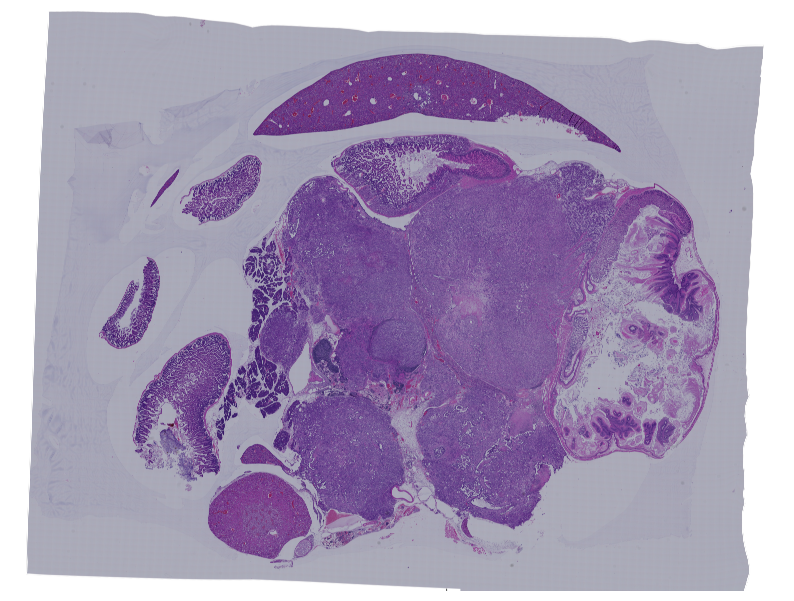

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(img_ff) # display HE
plt.axis('off');

In [10]:
file_tiff = tif8.loc[ff, 'MT']
file_tiff

'KPCL159-2-0039-MT.tif'

In [11]:
path_tiff = os.path.join(dir_tiff, 'MT', file_tiff)
path_tiff

'/project/dsc-is/data/KPCL159/Block2/MT/KPCL159-2-0039-MT.tif'

In [12]:
img_ff = tifffile.imread(path_tiff)
img_ff.shape

(15000, 20000, 3)

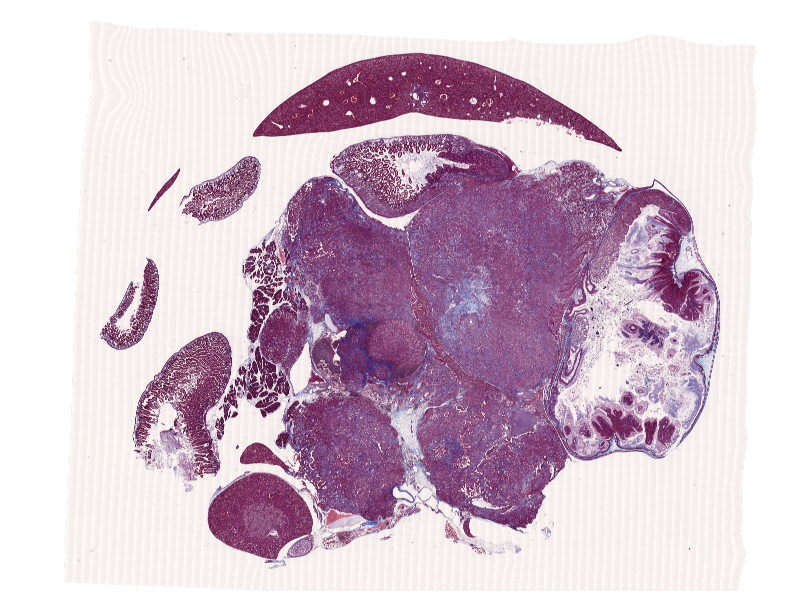

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(img_ff) # display MT
plt.axis('off');

In [14]:
file_tiff = tif8.loc[ff, 'CD31']
file_tiff

'KPCL159_2_0033_CD31.tif'

In [15]:
path_tiff = os.path.join(dir_tiff, 'CD31', file_tiff)
path_tiff

'/project/dsc-is/data/KPCL159/Block2/CD31/KPCL159_2_0033_CD31.tif'

In [16]:
img_ff = tifffile.imread(path_tiff)
img_ff.shape

(15000, 20000, 3)

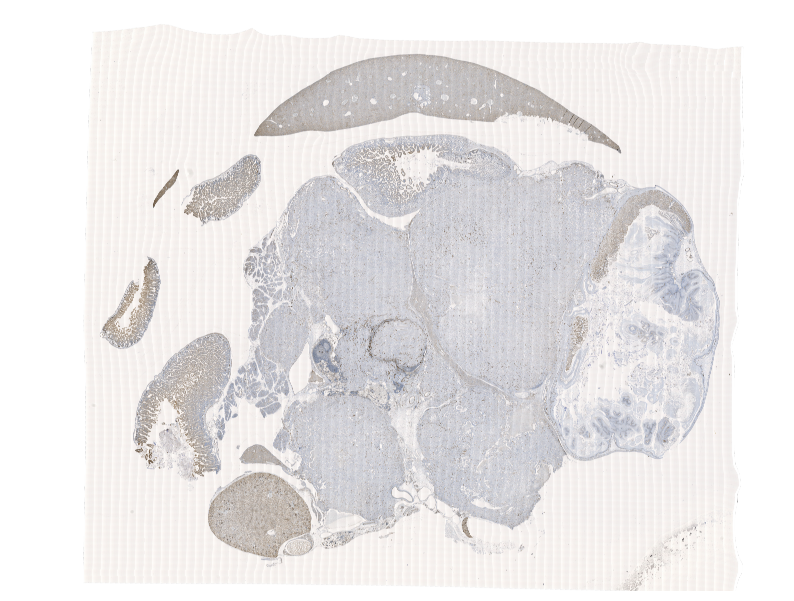

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(img_ff) # display CD31
plt.axis('off');

In [18]:
file_tiff = tif8.loc[ff, 'CK19']
file_tiff

'KPCL159_2_0037_CK19.tif'

In [19]:
path_tiff = os.path.join(dir_tiff, 'CK19', file_tiff)
path_tiff

'/project/dsc-is/data/KPCL159/Block2/CK19/KPCL159_2_0037_CK19.tif'

In [20]:
img_ff = tifffile.imread(path_tiff)
img_ff.shape

(15000, 20000, 3)

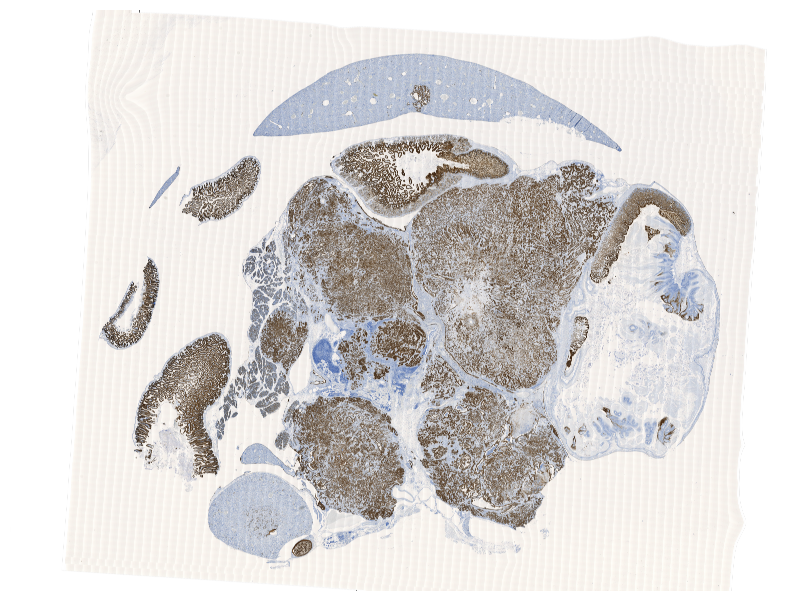

In [21]:
plt.figure(figsize=(10, 10))
plt.imshow(img_ff) # display CK19
plt.axis('off');

In [22]:
file_tiff = tif8.loc[ff, 'Ki67']
file_tiff

'KPCL159-2-0035-Ki67.tif'

In [23]:
path_tiff = os.path.join(dir_tiff, 'Ki67', file_tiff)
path_tiff

'/project/dsc-is/data/KPCL159/Block2/Ki67/KPCL159-2-0035-Ki67.tif'

In [24]:
img_ff = tifffile.imread(path_tiff)
img_ff.shape

(15000, 20000, 3)

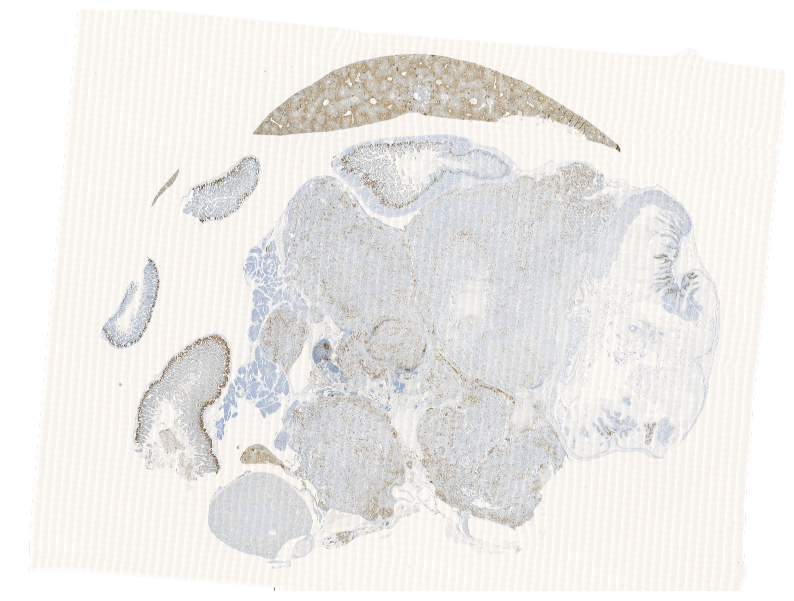

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(img_ff) # display Ki67
plt.axis('off');

In [26]:
ny_org, nx_org, _ = img_ff.shape
dx_org, dy_org = 128, 128 # replace 128 with 64 to create 64x64 patches
dx_src, dy_src = 128, 128 # replace 128 with 64 to create 64x64 patches
nb = tif8.shape[0]
print(nb) # total WSIs
n_sample = 20000 # for 20000 patches

191


In [27]:
ny_org, nx_org # height and width of each WSI

(15000, 20000)

In [28]:
bbb_Block2 = np.array_split(np.arange(n_sample), nb)

In [29]:
xxyy = np.zeros((n_sample, 3), dtype=int)
xxx_Block2 = np.zeros((n_sample, 8, dx_src, dy_src, 3), dtype=np.uint8)

In [30]:
xxx_Block2.shape # this will be the shape of the dataset

(20000, 8, 128, 128, 3)

In [ ]:
# create dataset

for ff in range(nb):
    print('fid', ff)
    bbb = bbb_Block2[ff]
    file_tiff = tif8.loc[ff, 'HE_1']
    path_tiff = os.path.join(dir_tiff, 'HE', file_tiff)
    img_ff = tifffile.imread(path_tiff)
    for bb in bbb:
        while(True):
            xx = np.random.randint(nx_org - dx_org)
            yy = np.random.randint(nx_org - dx_org)
            img_tmp = img_ff[yy:(yy+dy_org), xx:(xx+dx_org)] / 255.0
            std_tmp = np.std(img_tmp)
            if (std_tmp > 0.075 and std_tmp < 0.25):
                xxyy[bb, :] = (ff, xx, yy)
                break
    
    for cc, ss in enumerate(src_type8):
        print(ss)
        dd = sid8[ss]
        file_tiff = tif8.iloc[ff, dd]
        path_tiff = os.path.join(dir_tiff, src_dir[ss], file_tiff)
        img_ff = tifffile.imread(path_tiff)
        for bb in bbb:
            _, xx, yy = xxyy[bb, :]
            img_tmp = Image.fromarray(img_ff[yy:(yy+dy_org), xx:(xx+dx_org)])
            img_src = img_tmp.resize((dy_src, dx_src))
            xxx_Block2[bb, cc, :, :, :] = np.array(img_src)

In [ ]:
# visualize a patch from the dataset with 5 stainings

plt.imshow(xxx_Block2[0, 0])
plt.title('HE', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(xxx_Block2[0, 7])
plt.title('MT', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(xxx_Block2[0, 4])
plt.title('CD31', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(xxx_Block2[0, 5])
plt.title('CK19', fontsize=20)
plt.axis('off')
plt.show()
plt.imshow(xxx_Block2[0, 6])
plt.title('Ki67', fontsize=20)
plt.axis('off')
plt.show();

In [ ]:
np.save('./slice128_Block2_20K.npy', xxx_Block2) # save in the present working directory

In [ ]:
xxx_Block2.shape # check shape